In [26]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.linear_model import LinearRegression, SGDRegressor
from   sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

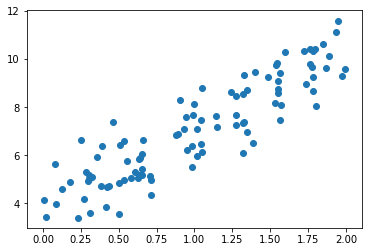

In [3]:
plt.scatter(X, y);

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.76592016],
       [3.267993  ]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # prepend 1 on each subarray, eg:
# [[0]  -> [[1, 0]
#  [2]] -> [[1, 2]]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.76592016],
       [10.30190615]])

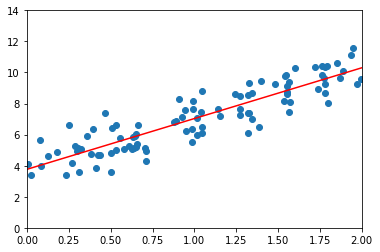

In [8]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r-')
plt.axis([0, 2, 0, 14]);

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([3.76592016]), array([[3.267993]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.76592016],
       [10.30190615]])

In [11]:
theta_best_svd, resids, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.76592016],
       [3.267993  ]])

In [12]:
resids # sum?

array([82.33625388])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.76592016],
       [3.267993  ]])

In [14]:
ETA = 0.1
ITERS = 1000
m = 100 # n records
theta = np.random.randn(2, 1) # init coefs

In [15]:
for i in range(ITERS):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (ETA * gradients)

In [16]:
theta

array([[3.76592016],
       [3.267993  ]])

In [17]:
EPOCHS = 50
t0, t1 = 5, 50 # learning sched hyperparams

In [18]:
def learning_schedule(t):
    return t0 / (t + t1)

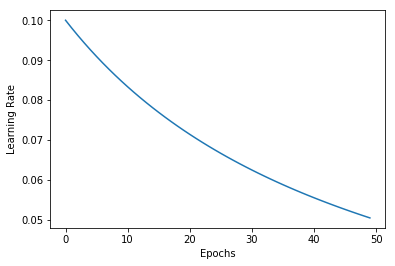

In [19]:
ts = range(EPOCHS)
etas = map(learning_schedule, ts)
plt.plot(list(ts), list(etas))
plt.xlabel('Epochs')
plt.ylabel('Learning Rate');

In [20]:
theta = np.random.randn(2, 1) # init coefs

for epoch in range(EPOCHS):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx + 1]
        yi = y[rand_idx:rand_idx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        
theta        

array([[3.77466634],
       [3.3186713 ]])

In [21]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.71913859]), array([3.25044913]))

# Polynomial Regression

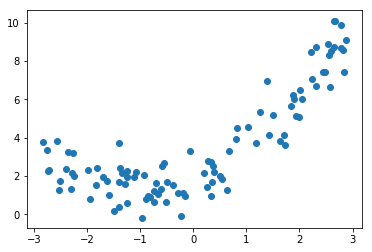

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y);

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8582749]), array([[1.07802084, 0.54354856]]))